In [ ]:
# %% [markdown]
# # Mental Health Dataset Analizi (Jupyter Optimize)
# *Not: Her hücreyi tek tek çalıştırabilirsiniz*
# %% [code]
# VERİ TEMİZLİĞİ VE İÇERİĞİ

# Hücre 1: Kütüphaneler ve Veri Yükleme
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("mental_health_diagnosis_treatment.xlsx")
print("Veri yüklendi!")


# Gereksiz sütunları sil (ID ve Başlangıç Tarihi)
df.drop(columns=["Patient ID", "Treatment Start Date"], inplace=True)
print("Gereksiz sütunlar silindi!")

# Kategorik veri tipi atamaları
kategorik_sütunlar = ["Gender", "Diagnosis", "Medication", "Therapy Type", 
                      "Outcome", "AI-Detected Emotional State"]

for col in kategorik_sütunlar:
    df[col] = df[col].astype("category")

print("Kategorik sütunlar dönüştürüldü!")

# %% [code]
# Hücre 2: Temel Bilgiler
print("--- Genel Bilgi ---")
display(df.info())
print("\n--- Eksik Veriler ---")
display(df.isnull().sum())

# %% [code]
# Hücre 3: Kategorik Dağılımlar
with pd.option_context('display.max_rows', None):
    print("\n --- Cinsiyet Dağılımı:")
    print(df["Gender"].value_counts(), "\n")
    print("\n--- Tanılar ---")
    display(df['Diagnosis'].value_counts())
    print("\n--- İlaçlar ---")
    display(df['Medication'].value_counts())
    print("\n--- Terapi Türleri ---")
    display(df['Therapy Type'].value_counts())
    print("\n--- AI Tespitli Duygusal Durum Dağılımı ---")
    display(df["AI-Detected Emotional State"].value_counts())
    print("\n--- Outcome ---")
    display(df['Outcome'].value_counts())
    
# %% [code]
# Hücre 7: Tüm Korelasyonlar
print("\n Tüm Korelasyon Matrisi:")
display(df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))


Veri yüklendi!
Gereksiz sütunlar silindi!
Kategorik sütunlar dönüştürüldü!
--- Genel Bilgi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           500 non-null    int64   
 1   Gender                        500 non-null    category
 2   Diagnosis                     500 non-null    category
 3   Symptom Severity (1-10)       500 non-null    int64   
 4   Mood Score (1-10)             500 non-null    int64   
 5   Sleep Quality (1-10)          500 non-null    int64   
 6   Physical Activity (hrs/week)  500 non-null    int64   
 7   Medication                    500 non-null    category
 8   Therapy Type                  500 non-null    category
 9   Treatment Duration (weeks)    500 non-null    int64   
 10  Stress Level (1-10)           500 non-null    int64   
 11  Outcome        

None


--- Eksik Veriler ---


Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64


 --- Cinsiyet Dağılımı:
Gender
Male      266
Female    234
Name: count, dtype: int64 


--- Tanılar ---


Diagnosis
Generalized Anxiety          135
Major Depressive Disorder    125
Bipolar Disorder             124
Panic Disorder               116
Name: count, dtype: int64


--- İlaçlar ---


Medication
Benzodiazepines     90
SSRIs               89
Mood Stabilizers    87
Antipsychotics      87
Antidepressants     76
Anxiolytics         71
Name: count, dtype: int64


--- Terapi Türleri ---


Therapy Type
Mindfulness-Based Therapy         130
Dialectical Behavioral Therapy    129
Interpersonal Therapy             124
Cognitive Behavioral Therapy      117
Name: count, dtype: int64


--- AI Tespitli Duygusal Durum Dağılımı ---


AI-Detected Emotional State
Anxious      102
Neutral       87
Excited       85
Stressed      79
Happy         78
Depressed     69
Name: count, dtype: int64


--- Outcome ---


Outcome
Deteriorated    171
Improved        170
No Change       159
Name: count, dtype: int64


 Tüm Korelasyon Matrisi:


Outcome_num sütunu eklendi!
Hipotez 1: Uyku kalitesi ile stres seviyesi arasında negatif korelasyon vardır

-- Normallik Testi Sonuçları (Shapiro-Wilk) --
Uyku Kalitesi p-değeri: 0.0000
Stres Seviyesi p-değeri: 0.0000

Veriler normal dağılmıyor → Spearman korelasyon uygulanıyor

-- Spearman Korelasyon Sonucu --
Korelasyon katsayısı: 0.038
p-değeri: 0.4025
SONUÇ: Uyku kalitesi ile stres seviyesi arasında istatistiksel olarak anlamlı bir ilişki bulunamadı (p = 0.4025)
YORUM: Uyku kalitesi ve stres seviyesi arasında anlamlı bir bağlantı yoktur


Hipotez 2: Uygulanan terapi türlerine göre ‘outcome’ değişkenlik göstermektedir.
Kruskal-Wallis Testi: H = 2.51, p = 0.4739

SONUÇ: Terapi türleri arasında anlamlı fark yok


C:\Users\90546\AppData\Local\Temp\ipykernel_11836\687082746.py:88: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_counts = df.groupby(['Therapy Type', 'Outcome']).size().reset_index(name='Count')


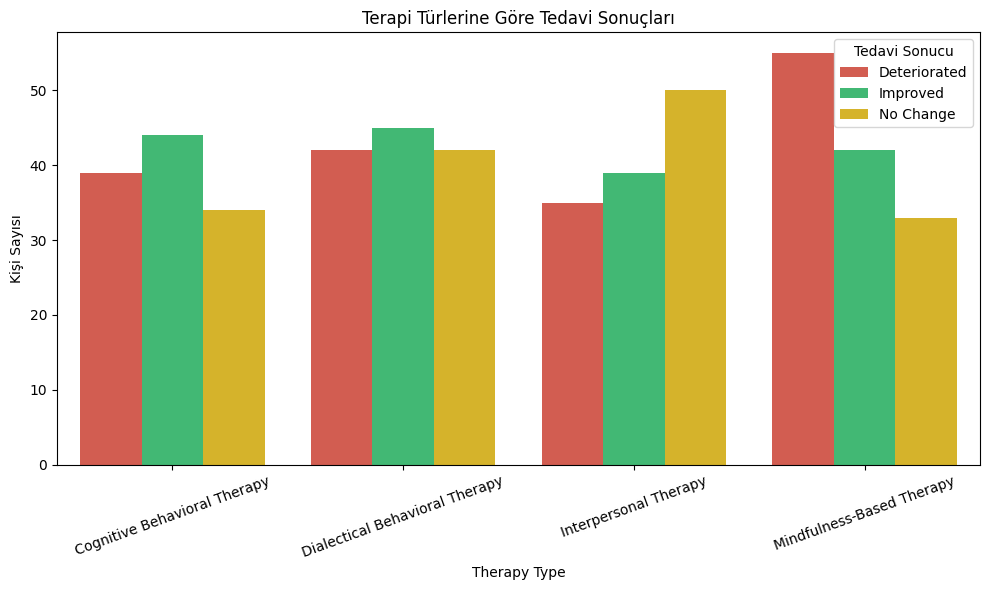

Hipotez 3: 'Anxious' grubunda semptom şiddeti daha yüksektir.

Normallik Testi (Anxious): W = 0.897, p = 0.0000
Normallik Testi (Diğerleri): W = 0.908, p = 0.0000

Mann-Whitney U Testi: U = 19159, p = 0.8127

SONUÇ: Anlamlı fark YOK (p > 0.05)


C:\Users\90546\AppData\Local\Temp\ipykernel_11836\687082746.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AI-Detected Emotional State', y='Symptom Severity (1-10)',


Hipotez 4: Kadın ve erkeklerin tedavi sonuçları farklıdır

Çapraz Tablo:
Outcome  Deteriorated  Improved  No Change
Gender                                    
Female             83        72         79
Male               88        98         80

Ki-Kare Testi: χ² = 2.09, p = 0.3518

SONUÇ: Cinsiyet ve tedavi sonucu arasında anlamlı ilişki yok


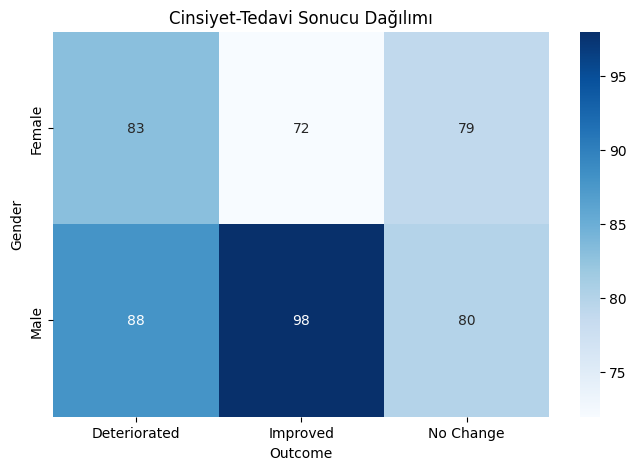

Hipotez 5: Yaş ile tedavi başarısı arasında ilişki var
Spearman korelasyonu: ρ = -0.081, p = 0.0706
SONUÇ: Yaş ile tedavi başarısı arasında anlamlı ilişki yok (p = 0.0706)


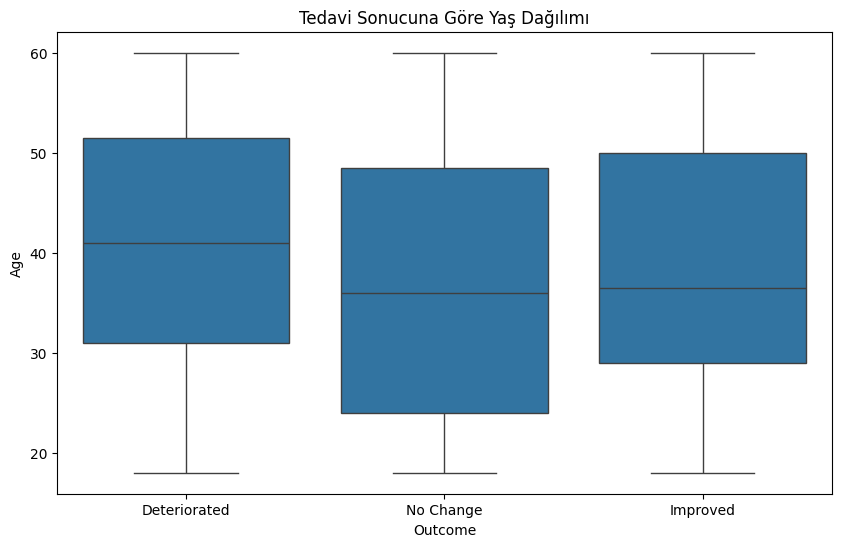

Hipotez 6: Fiziksel aktivite düzeyi tedavi sonucunu etkilemektedir.

Kruskal-Wallis Testi: H = 2.52, p = 0.2830

SONUÇ: Anlamlı ilişki yok


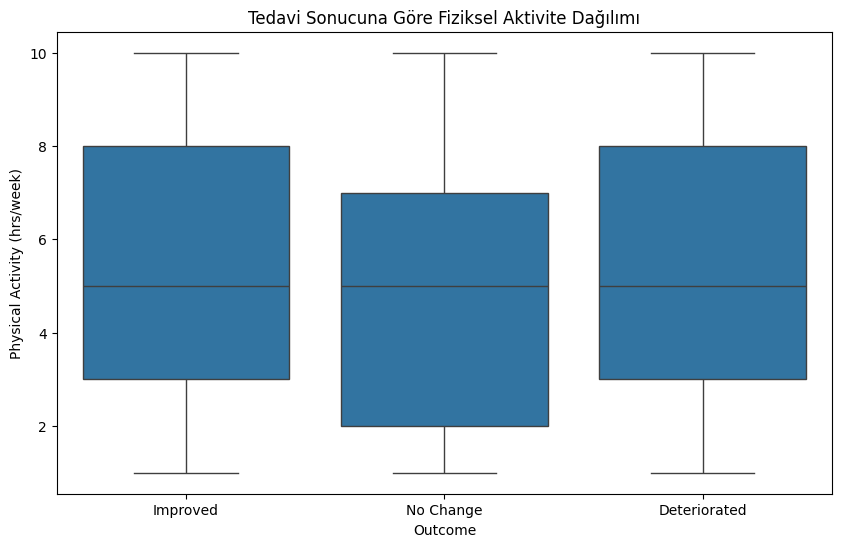

Hipotez 7: Kullanılan ilaç  türüne göre ‘outcome’ değişkenlik göstermektedir.

Çapraz Tablo:
 Outcome           Deteriorated  Improved  No Change
Medication                                         
Antidepressants             32        23         21
Antipsychotics              30        29         28
Anxiolytics                 27        20         24
Benzodiazepines             32        29         29
Mood Stabilizers            25        38         24
SSRIs                       25        31         33 

Ki-kare İstatistiği: χ² = 8.79, p-değeri = 0.5525

Sonuç: İlaç türüne göre outcome dağılımı anlamlı şekilde farklı DEĞİL.



<Figure size 1000x600 with 0 Axes>

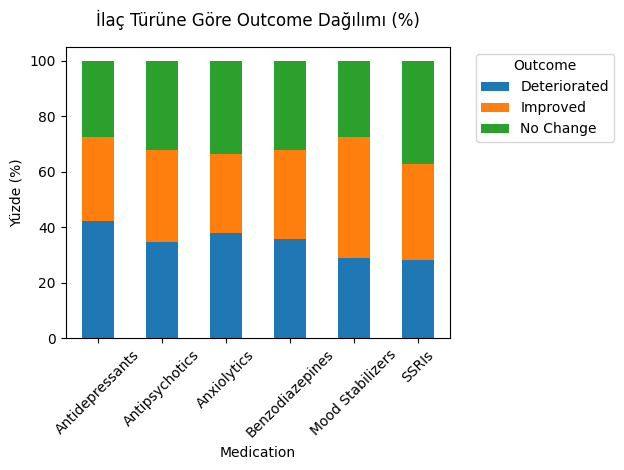

Hipotez 8 : Kadınlarda erkeklere göre tedaviye uyum daha azdır

Normallik Testi (Female): W = 0.944, p = 0.0000
Normallik Testi (Male):   W = 0.943, p = 0.0000

Mann-Whitney U Testi (Kadın < Erkek): İstatistik = 31961.000, p = 0.6988
SONUÇ: Kadınlarla erkeklerin tedaviye uyum oranları arasında anlamlı fark yok.


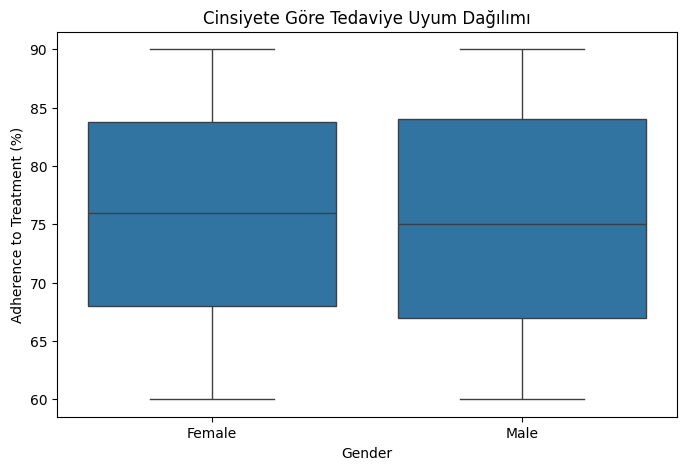

In [4]:
#HİPOTEZ TESTLERİ - 8 ADET TEST BULUNMAKTADIR
# %% [code]
# Hipotez 1 - Uyku Kalitesi ve Stres İlişkisi

from scipy import stats

# Outcome sütununu sayısala çevir
outcome_map = {'Deteriorated': 0, 'No Change': 1, 'Improved': 2}
df['Outcome_num'] = df['Outcome'].map(outcome_map)
print("Outcome_num sütunu eklendi!")

print("Hipotez 1: Uyku kalitesi ile stres seviyesi arasında negatif korelasyon vardır")

# Normallik testi (Shapiro-Wilk)
p_sleep = stats.shapiro(df["Sleep Quality (1-10)"]).pvalue
p_stress = stats.shapiro(df["Stress Level (1-10)"]).pvalue

print(f"\n-- Normallik Testi Sonuçları (Shapiro-Wilk) --")
print(f"Uyku Kalitesi p-değeri: {p_sleep:.4f}")
print(f"Stres Seviyesi p-değeri: {p_stress:.4f}")

# Test seçimi
if p_sleep > 0.05 and p_stress > 0.05:
    print("\nVeriler normal dağılmış → Pearson korelasyon uygulanıyor")
    corr, p = stats.pearsonr(df['Sleep Quality (1-10)'], df['Stress Level (1-10)'])
    test_adi = "Pearson"
else:
    print("\nVeriler normal dağılmıyor → Spearman korelasyon uygulanıyor")
    corr, p = stats.spearmanr(df['Sleep Quality (1-10)'], df['Stress Level (1-10)'])
    test_adi = "Spearman"

print(f"\n-- {test_adi} Korelasyon Sonucu --")
print(f"Korelasyon katsayısı: {corr:.3f}")
print(f"p-değeri: {p:.4f}")

if p < 0.05:
    print(f"SONUÇ: Uyku kalitesi ile stres seviyesi arasında {'negatif' if corr < 0 else 'pozitif'} ve anlamlı bir ilişki bulundu (p = {p:.4f})")
    print("YORUM: Daha iyi uyku kalitesi, daha düşük stres seviyesi ile ilişkilidir")
else:
    print(f"SONUÇ: Uyku kalitesi ile stres seviyesi arasında istatistiksel olarak anlamlı bir ilişki bulunamadı (p = {p:.4f})")
    print("YORUM: Uyku kalitesi ve stres seviyesi arasında anlamlı bir bağlantı yoktur")

# Görselleştirme
plt.figure(figsize=(8,5))
sns.regplot(x='Sleep Quality (1-10)', y='Stress Level (1-10)', data=df, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Uyku Kalitesi ve Stres İlişkisi")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#Hipotez 2: Terapi Türleri Arasındaki Farklılıklar (GUNCEL TEST)
# %% [code]
# 1. Normallik varsayımı olmadan analiz
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

print("Hipotez 2: Uygulanan terapi türlerine göre ‘outcome’ değişkenlik göstermektedir.")

# Grupları oluştur
therapy_groups = {
    'CBT': df[df['Therapy Type']=='Cognitive Behavioral Therapy']['Outcome_num'],
    'MBT': df[df['Therapy Type']=='Mindfulness-Based Therapy']['Outcome_num'],
    'IPT': df[df['Therapy Type']=='Interpersonal Therapy']['Outcome_num'],
    'DBT': df[df['Therapy Type']=='Dialectical Behavioral Therapy']['Outcome_num']
}

# Kruskal-Wallis Testi (Non-parametrik ANOVA)
h_stat, p_val = stats.kruskal(*therapy_groups.values())
print(f"Kruskal-Wallis Testi: H = {h_stat:.2f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("\nSONUÇ: Terapi türleri arasında anlamlı fark var (p < 0.05)")
    
    # Post-hoc Mann-Whitney U testleri (Bonferroni düzeltmeli)
    from itertools import combinations
    print("\nPost-hoc Karşılaştırmalar (Mann-Whitney U):")
    for (name1, group1), (name2, group2) in combinations(therapy_groups.items(), 2):
        u_stat, p_uncorrected = stats.mannwhitneyu(group1, group2)
        p_corrected = min(p_uncorrected * 6, 1.0)  # Bonferroni düzeltmesi (6 karşılaştırma)
        print(f"{name1} vs {name2}: p = {p_corrected:.4f} {'*' if p_corrected < 0.05 else ''}")
else:
    print("\nSONUÇ: Terapi türleri arasında anlamlı fark yok")


# Outcome'ları sayarak tablo oluştur
outcome_counts = df.groupby(['Therapy Type', 'Outcome']).size().reset_index(name='Count')

# Renkleri sabitleme
palette = {'Deteriorated': '#e74c3c', 'No Change': '#f1c40f', 'Improved': '#2ecc71'}

# Çubuk grafiği
plt.figure(figsize=(10,6))
sns.barplot(x='Therapy Type', y='Count', hue='Outcome', data=outcome_counts, palette=palette)
plt.title('Terapi Türlerine Göre Tedavi Sonuçları')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=20)
plt.legend(title='Tedavi Sonucu')
plt.tight_layout()
plt.show()


# %% [code]
# Hipotez 3 - Anksiyete Grubunun Semptom Şiddeti
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

print("Hipotez 3: 'Anxious' grubunda semptom şiddeti daha yüksektir.")

# 1. Grupları oluştur
anxious = df[df['AI-Detected Emotional State'] == 'Anxious']['Symptom Severity (1-10)']
others = df[df['AI-Detected Emotional State'] != 'Anxious']['Symptom Severity (1-10)']

# 2. Normallik testi (MAX 500 örnekle - tüm veriyi kullan)
norm_a = stats.shapiro(anxious) if len(anxious) > 3 else (None, 1.0)
norm_o = stats.shapiro(others) if len(others) > 3 else (None, 1.0)

print(f"\nNormallik Testi (Anxious): W = {norm_a[0]:.3f}, p = {norm_a[1]:.4f}")
print(f"Normallik Testi (Diğerleri): W = {norm_o[0]:.3f}, p = {norm_o[1]:.4f}")

# 3. Non-parametrik test (Mann-Whitney U)
stat, p = stats.mannwhitneyu(anxious, others, alternative='greater')
print(f"\nMann-Whitney U Testi: U = {stat:.0f}, p = {p:.4f}")

if p < 0.05:
    print(f"\nSONUÇ: Anksiyete grubunda semptom şiddeti BELİRGİN ŞEKİLDE YÜKSEK (p = {p:.4f})")
    print(f"Ortalamalar → Anksiyete: {anxious.mean():.2f} vs Diğerleri: {others.mean():.2f}")
    print(f"Standart Sapma → Anksiyete: {anxious.std():.2f} vs Diğerleri: {others.std():.2f}")
else:
    print("\nSONUÇ: Anlamlı fark YOK (p > 0.05)")

# 4. Görselleştirme
plt.figure(figsize=(10,6))
sns.violinplot(x='AI-Detected Emotional State', y='Symptom Severity (1-10)', 
               data=df, palette="Set2", inner="quartile")
plt.title("ANKSİYETE DURUMUNA GÖRE SEMPTOM ŞİDDETİ\n(Mann-Whitney U Testi)")
plt.axhline(y=df['Symptom Severity (1-10)'].mean(), color='r', linestyle='--', label='Genel Ortalama')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# %% [code]
# Hipotez 4: Cinsiyet ve Tedavi Sonucu İlişkisi
print("Hipotez 4: Kadın ve erkeklerin tedavi sonuçları farklıdır")

# Kontenjans tablosu
contingency_table = pd.crosstab(df['Gender'], df['Outcome'])
print("\nÇapraz Tablo:")
print(contingency_table)

# Ki-Kare Testi
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nKi-Kare Testi: χ² = {chi2:.2f}, p = {p:.4f}")

if p < 0.05:
    print("\nSONUÇ: Cinsiyet ve tedavi sonucu arasında anlamlı ilişki var (p < 0.05)")
    print("YORUM: En belirgin farklar:")
    # Standartlaştırılmış artıklarla hangi hücrelerin anlamlı olduğunu bulma
    residuals = (contingency_table - expected) / np.sqrt(expected)
    print(residuals)
else:
    print("\nSONUÇ: Cinsiyet ve tedavi sonucu arasında anlamlı ilişki yok")

# Görselleştirme
plt.figure(figsize=(8,5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="Blues")
plt.title("Cinsiyet-Tedavi Sonucu Dağılımı")
plt.show()

# %% [code]
# Hipotez 5 - Yaş ve Tedavi Başarısı
print("Hipotez 5: Yaş ile tedavi başarısı arasında ilişki var")

rho, p = stats.spearmanr(df['Age'], df['Outcome_num'])
print(f"Spearman korelasyonu: ρ = {rho:.3f}, p = {p:.4f}")

if p < 0.05:
    print(f"SONUÇ: Yaş ile tedavi başarısı arasında anlamlı {'pozitif' if rho>0 else 'negatif'} ilişki var (p = {p:.4f})")
else:
    print(f"SONUÇ: Yaş ile tedavi başarısı arasında anlamlı ilişki yok (p = {p:.4f})")

# Görsel
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Age', data=df, 
            order=['Deteriorated','No Change','Improved'])
plt.title("Tedavi Sonucuna Göre Yaş Dağılımı")
plt.show()

# %% [code]
# Hipotez 6: Fiziksel Aktivite ve Tedavi Sonucu
print("Hipotez 6: Fiziksel aktivite düzeyi tedavi sonucunu etkilemektedir.")

# Grupları ayır
physical_activity = {
    'Improved': df[df['Outcome'] == 'Improved']['Physical Activity (hrs/week)'],
    'No Change': df[df['Outcome'] == 'No Change']['Physical Activity (hrs/week)'],
    'Deteriorated': df[df['Outcome'] == 'Deteriorated']['Physical Activity (hrs/week)']
}

# Kruskal-Wallis Testi
h_stat, p_val = stats.kruskal(*physical_activity.values())
print(f"\nKruskal-Wallis Testi: H = {h_stat:.2f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("\nSONUÇ: Fiziksel aktivite ve tedavi sonucu arasında anlamlı ilişki var")
    # Post-hoc Dunn testi
    from scikit_posthocs import posthoc_dunn
    dunn_results = posthoc_dunn(list(physical_activity.values()), p_adjust='bonferroni')
    print("\nPost-hoc Dunn Testi (p-değerleri):")
    print(dunn_results)
else:
    print("\nSONUÇ: Anlamlı ilişki yok")

# Görselleştirme
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Physical Activity (hrs/week)', 
            data=df, order=['Improved','No Change','Deteriorated'])
plt.title("Tedavi Sonucuna Göre Fiziksel Aktivite Dağılımı")
plt.show()


# %% [code]
# Hipotez 7: İlaç Türü ile Tedavi Sonucu İlişkisi 
from scipy.stats import chi2_contingency

print("Hipotez 7: Kullanılan ilaç  türüne göre ‘outcome’ değişkenlik göstermektedir.\n")

# 1. Çapraz Tablo ve Ki-kare testi
contingency = pd.crosstab(df["Medication"], df["Outcome"])
print("Çapraz Tablo:\n", contingency, "\n")

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Ki-kare İstatistiği: χ² = {chi2:.2f}, p-değeri = {p:.4f}\n")
if p < 0.05:
    print("Sonuç: İlaç türüne göre outcome dağılımı anlamlı şekilde farklı.\n")
else:
    print("Sonuç: İlaç türüne göre outcome dağılımı anlamlı şekilde farklı DEĞİL.\n")

# 2. Yüzdelik bazlı stacked bar chart
percent_df = contingency.div(contingency.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
percent_df.plot(kind="bar", stacked=True)
plt.title("İlaç Türüne Göre Outcome Dağılımı (%)", pad=15)
plt.ylabel("Yüzde (%)")
plt.xlabel("Medication")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# %% [code]
# Hipotez 8 : Kadınlarda erkeklere göre tedaviye uyum daha azdır (t-Test + Grafik)
df["Gender"] = df["Gender"].astype("category")

print("Hipotez 8 : Kadınlarda erkeklere göre tedaviye uyum daha azdır\n")

# 2. Grupları Oluştur
female_adherence = df[df["Gender"] == "Female"]["Adherence to Treatment (%)"].dropna()
male_adherence   = df[df["Gender"] == "Male"]["Adherence to Treatment (%)"].dropna()

# 3. Normallik Testi
norm_f = stats.shapiro(female_adherence) if len(female_adherence) >= 3 else (None, 1.0)
norm_m = stats.shapiro(male_adherence)   if len(male_adherence) >= 3   else (None, 1.0)
print(f"Normallik Testi (Female): W = {norm_f[0]:.3f}, p = {norm_f[1]:.4f}")
print(f"Normallik Testi (Male):   W = {norm_m[0]:.3f}, p = {norm_m[1]:.4f}\n")

# 4. Uygun Testi Seç ve Uygula
if norm_f[1] > 0.05 and norm_m[1] > 0.05:
    stat, p = stats.ttest_ind(female_adherence, male_adherence, equal_var=False)
    test_name = "Bağımsız Örneklem t-Testi"
else:
    stat, p = stats.mannwhitneyu(female_adherence, male_adherence, alternative='less')
    test_name = "Mann-Whitney U Testi (Kadın < Erkek)"

print(f"{test_name}: İstatistik = {stat:.3f}, p = {p:.4f}")
if p < 0.05:
    print("SONUÇ: Kadınlarla erkeklerin tedaviye uyum oranları arasında anlamlı fark var.")
else:
    print("SONUÇ: Kadınlarla erkeklerin tedaviye uyum oranları arasında anlamlı fark yok.")

# 5. Görselleştirme
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="Adherence to Treatment (%)", data=df)
plt.title("Cinsiyete Göre Tedaviye Uyum Dağılımı")
plt.ylabel("Adherence to Treatment (%)")
plt.xlabel("Gender")
plt.show()




In [5]:
# ENCODING SCALING 

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Excel dosyasını oku
df = pd.read_excel("mental_health_diagnosis_treatment.xlsx")

# 2. Gereksiz sütunu sil
df.drop(columns=['Patient ID'], inplace=True)

# Veri setini inceleme
print("'Patient ID' sütunu veri setinden kaldırıldı.\n")

# Outcome değerlerini sıralayıp iyileşenlere 3, değişmeyenlere 2, kötüleşenlere 1 ver
if "Outcome" in df.columns:
    # Outcome sıralaması: 'İyileşen' → 3, 'Değişmeyen' → 2, 'Kötüleşen' → 1
    outcome_mapping = {
        'Improved': 3,     
        'No Change': 2,    
        'Deteriorated': 1   
    }

    # Outcome sıralaması uygulama
    df["Outcome_Encoded"] = df["Outcome"].map(outcome_mapping)

    # Outcome sıralaması ve durumu
    print("\n Outcome Değerleri ve Atanan Sayılar (İyileşen: 3, Değişmeyen: 2, Kötüleşen: 1):")
    for label, number in outcome_mapping.items():
        print(f"'{label}' → {number}")
    
    # Outcome sıralı dağılımı
    print("\nOutcome_Encoded dağılımı (yüksekten düşüğe):")
    print(df["Outcome_Encoded"].value_counts().sort_index(ascending=False))

# 4. Kategorik sütunlar
categorical_cols = [
    'Gender',
    'Diagnosis',
    'Medication',
    'Therapy Type',
    'AI-Detected Emotional State'
]

# 5. Sayısal sütunlar
numeric_cols = [
    'Age',
    'Symptom Severity (1-10)',
    'Mood Score (1-10)',
    'Sleep Quality (1-10)',
    'Physical Activity (hrs/week)',
    'Treatment Duration (weeks)',
    'Stress Level (1-10)',
    'Treatment Progress (1-10)',
    'Adherence to Treatment (%)'
]

# 6. Kategorik verileri sayıya çevir
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    
    # Kategorik veriler için sıralama yapma
    category_counts = df[col].value_counts()
    sorted_categories = category_counts.sort_values(ascending=False).index
    print(f"\n{col} Kategorileri ve Sıralama Kriteri: Frekans (En Sık Olan En Üstte)")
    for idx, category in enumerate(sorted_categories):
        print(f"'{category}' → {idx} (Toplam: {category_counts[category]})")
    
    # Label encoding uygulama
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

# 7. Sayısal verileri ölçeklendirme
scaler = StandardScaler()

# Sayısal verilerde ondalıklı değerlerin neye göre belirlendiğini açıklama
print("\nSayısal veriler için Standartlaştırma yapılıyor (Mean=0, Std=1).")
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 8. İlk 5 satır
print("\nGüncellenmiş VeriFrame (İlk 5 Satır):")
print(df.head())

print("\n Sütun Açıklamaları ve Ölçekleme Sonrası Anlamlar:\n")

# Sayısal sütunlar
for col in numeric_cols:
    print(f"🔹 '{col}':")
    print("   - Bu sütun orijinalde farklı aralıklarda sayısal değerler içeriyordu.")
    print("   - StandardScaler uygulandığı için artık ortalaması 0, standart sapması 1 olan bir dağılıma sahiptir.")
    print("   - Bu dönüşüm, tüm sayısal sütunların aynı ölçekle çalışmasını sağlar.")
    print("   - Örnek Değer Anlamları:")
    print("     •  0.0: Verinin tam olarak ortalama değerde olduğunu gösterir.")
    print("     •  Pozitif Sayı (örn. 1.25): Değerin ortalamadan ne kadar yukarıda olduğunu gösterir (1.25 std sapma yukarıda).")
    print("     •  Negatif Sayı (örn. -0.75): Değerin ortalamadan ne kadar aşağıda olduğunu gösterir (0.75 std sapma aşağıda).")
    print("     •  -2.0 veya +2.0 gibi uç değerler: Aykırı (outlier) olabilir.\n")

# Kategorik sütunlar
print("\n Kategorik Sütunlar (Label Encoding ile Sayıya Çevrilmiş):\n")
for col in categorical_cols:
    print(f"🔸 '{col}':")
    le = label_encoders[col]
    classes = le.classes_
    print(f"   - Kategoriler otomatik olarak frekansa göre sıralandı ve aşağıdaki şekilde sayıya çevrildi:")
    for i, label in enumerate(classes):
        print(f"     • '{label}' → {i}")
    print("   - Model bu sayılarla çalışacak ama orijinal kategorik anlamı korumamız önemli.\n")

# Outcome sütunu
print(" 'Outcome_Encoded':")
print("   - Bu sütun, bireyin tedavi sürecindeki sonucunu temsil eder.")
print("   - Kendi içinde sıralı (ordinal) bir değişkendir.")
print("   - Atanan değerler:")
print("     • 'Improved' (İyileşen) → 3")
print("     • 'No Change' (Değişmeyen) → 2")
print("     • 'Deteriorated' (Kötüleşen) → 1")
print("   - Bu değerler, tedavi başarısını sıralı biçimde ifade eder. Model bu sıralamayı öğrenebilir.\n")

'Patient ID' sütunu veri setinden kaldırıldı.


 Outcome Değerleri ve Atanan Sayılar (İyileşen: 3, Değişmeyen: 2, Kötüleşen: 1):
'Improved' → 3
'No Change' → 2
'Deteriorated' → 1

Outcome_Encoded dağılımı (yüksekten düşüğe):
Outcome_Encoded
3    170
2    159
1    171
Name: count, dtype: int64

Gender Kategorileri ve Sıralama Kriteri: Frekans (En Sık Olan En Üstte)
'Male' → 0 (Toplam: 266)
'Female' → 1 (Toplam: 234)

Diagnosis Kategorileri ve Sıralama Kriteri: Frekans (En Sık Olan En Üstte)
'Generalized Anxiety' → 0 (Toplam: 135)
'Major Depressive Disorder' → 1 (Toplam: 125)
'Bipolar Disorder' → 2 (Toplam: 124)
'Panic Disorder' → 3 (Toplam: 116)

Medication Kategorileri ve Sıralama Kriteri: Frekans (En Sık Olan En Üstte)
'Benzodiazepines' → 0 (Toplam: 90)
'SSRIs' → 1 (Toplam: 89)
'Antipsychotics' → 2 (Toplam: 87)
'Mood Stabilizers' → 3 (Toplam: 87)
'Antidepressants' → 4 (Toplam: 76)
'Anxiolytics' → 5 (Toplam: 71)

Therapy Type Kategorileri ve Sıralama Kriteri: Frekans (En Sık Olan En Üs

Gereksiz sütunlar silindi!
Kategorik sütunlar dönüştürüldü!
   Age  Gender                  Diagnosis  Symptom Severity (1-10)  \
0   43  Female  Major Depressive Disorder                       10   
1   40  Female  Major Depressive Disorder                        9   
2   55  Female  Major Depressive Disorder                        6   
3   34  Female  Major Depressive Disorder                        6   
4   52    Male             Panic Disorder                        7   

   Mood Score (1-10)  Sleep Quality (1-10)  Physical Activity (hrs/week)  \
0                  5                     8                             5   
1                  5                     4                             7   
2                  3                     4                             3   
3                  3                     6                             5   
4                  6                     6                             8   

         Medication               Therapy Type  Treatment Dura

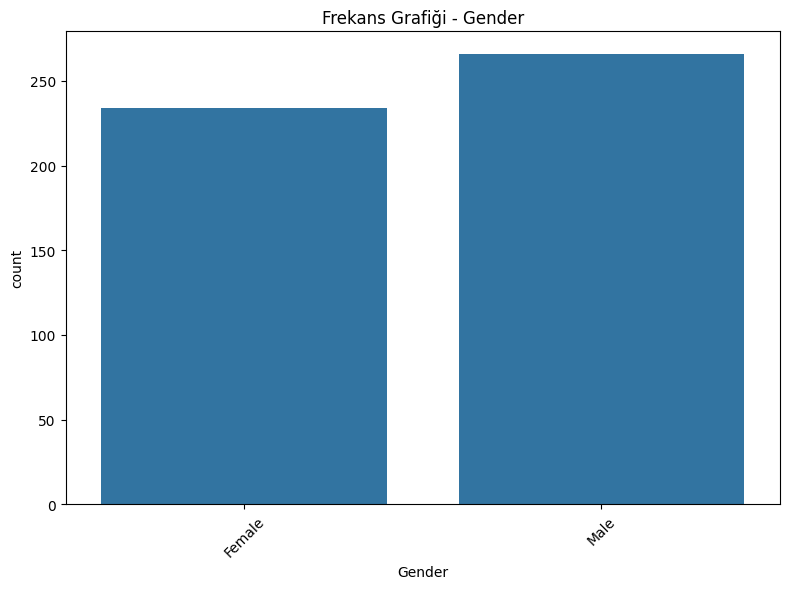

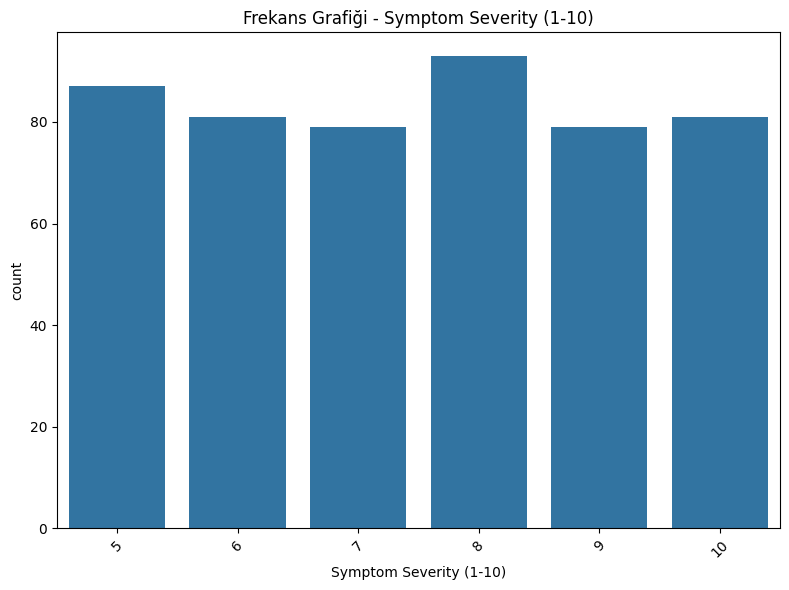

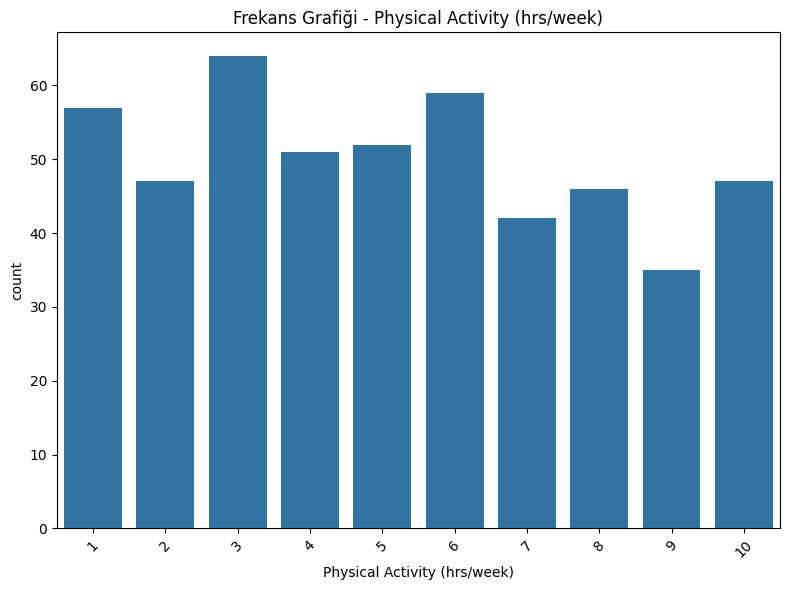

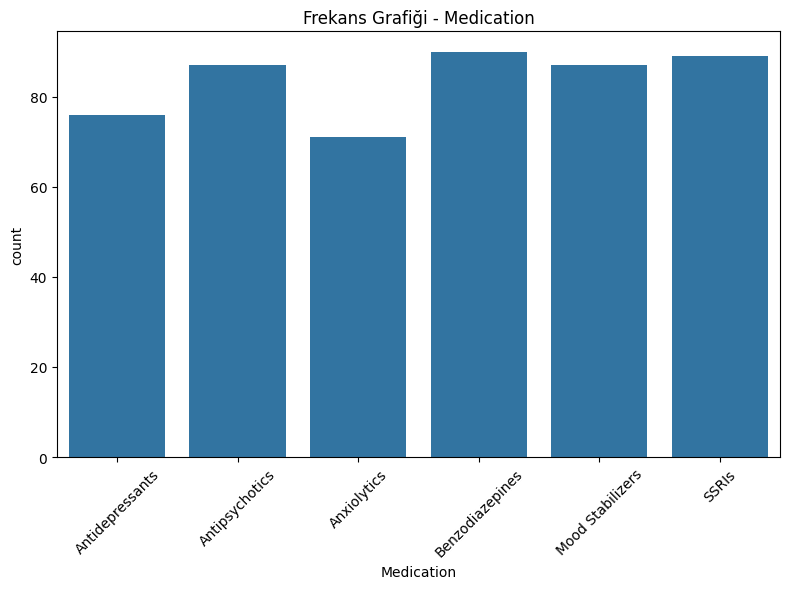

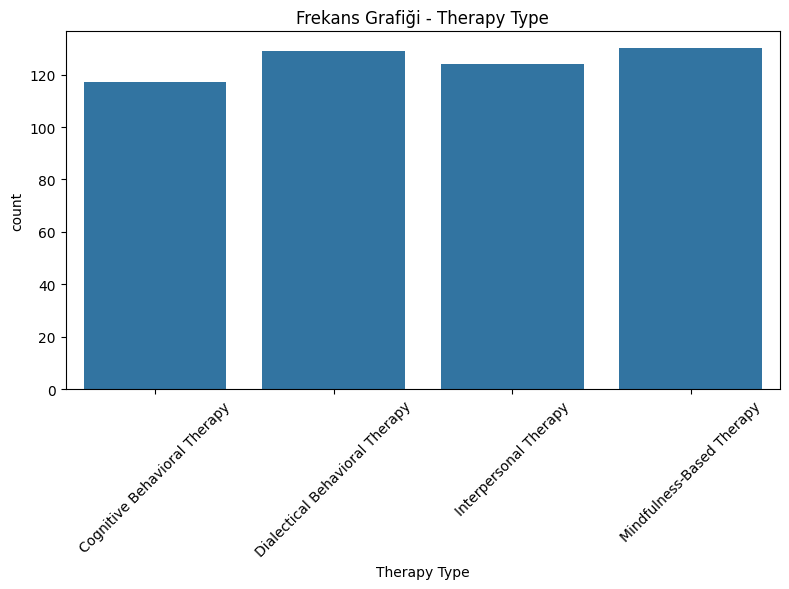

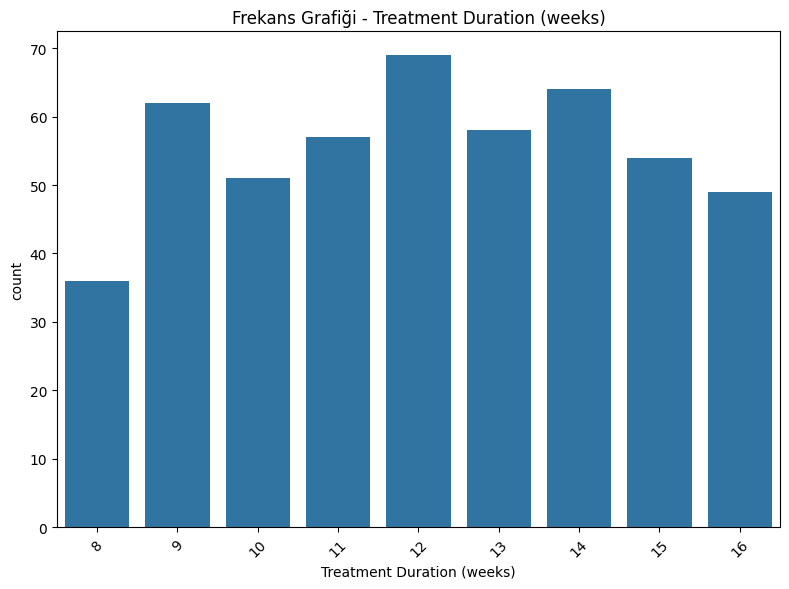

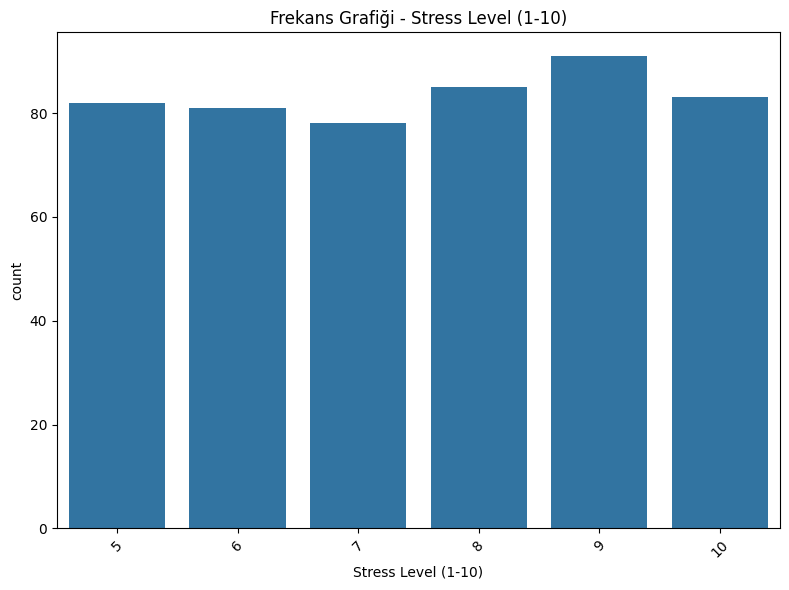

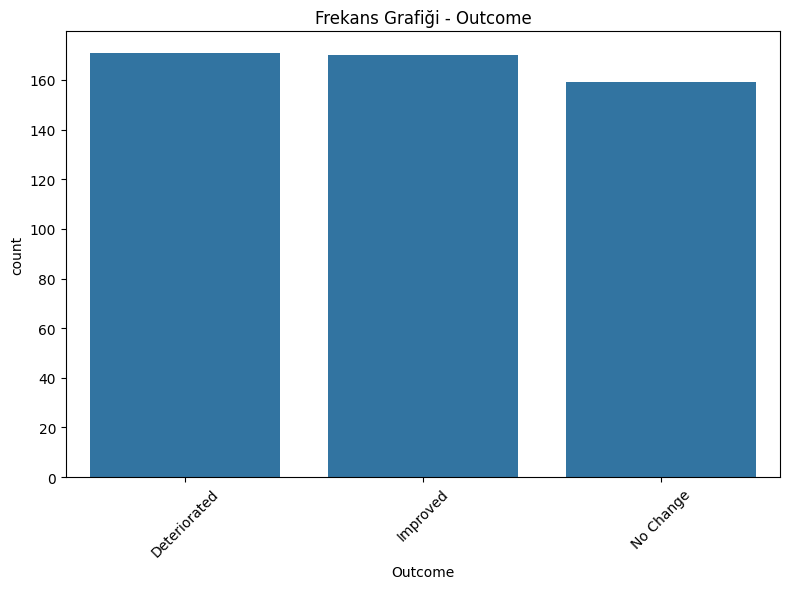

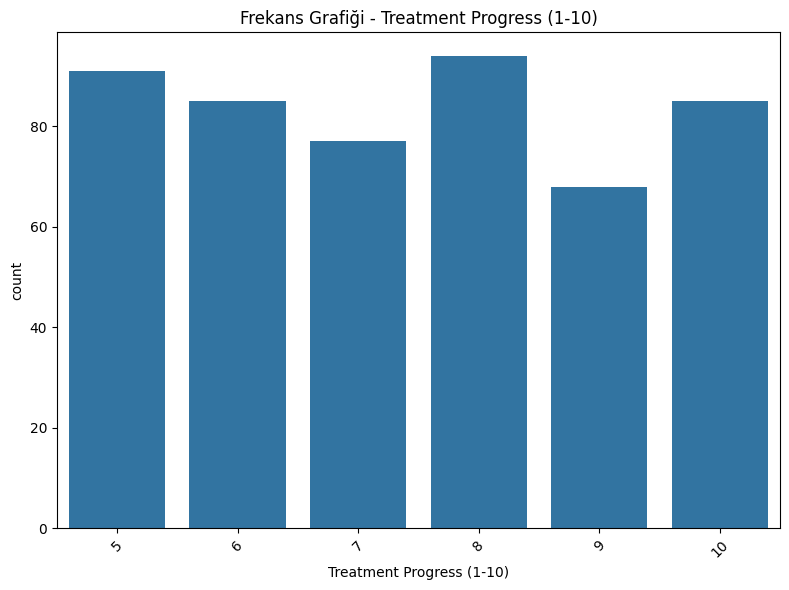

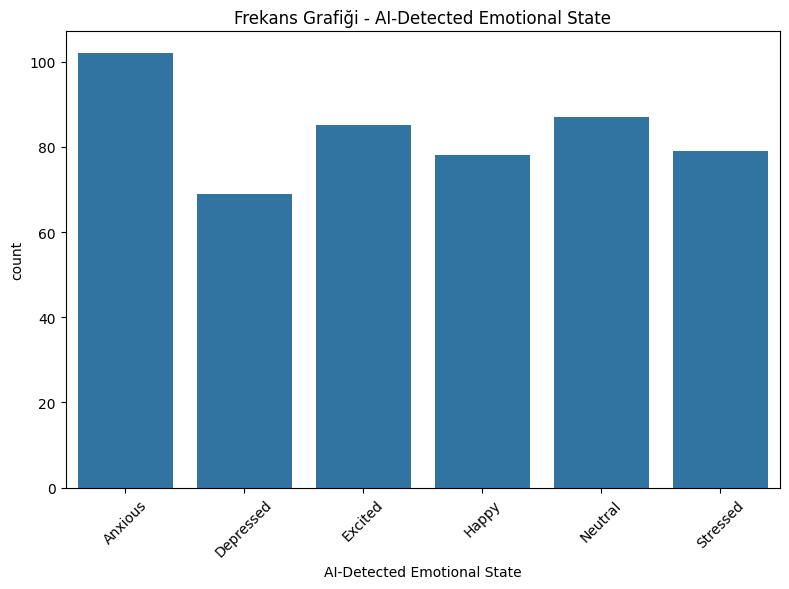

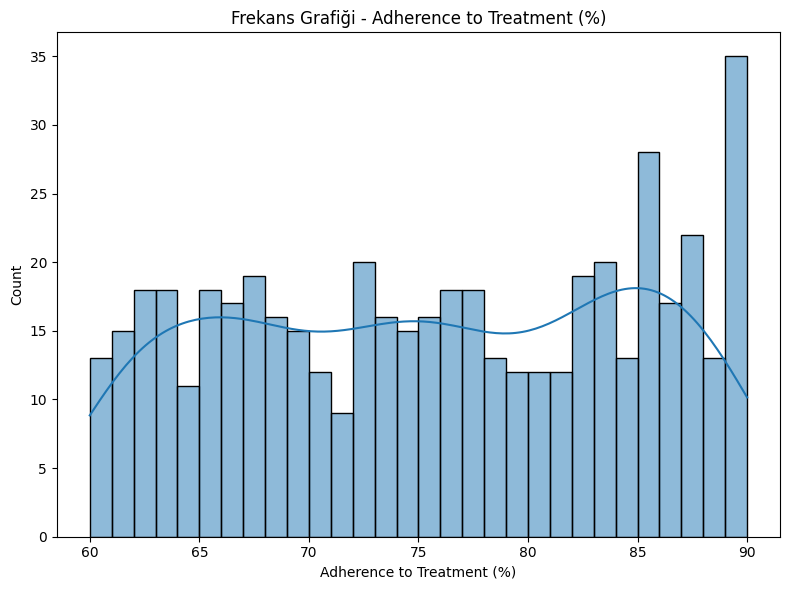

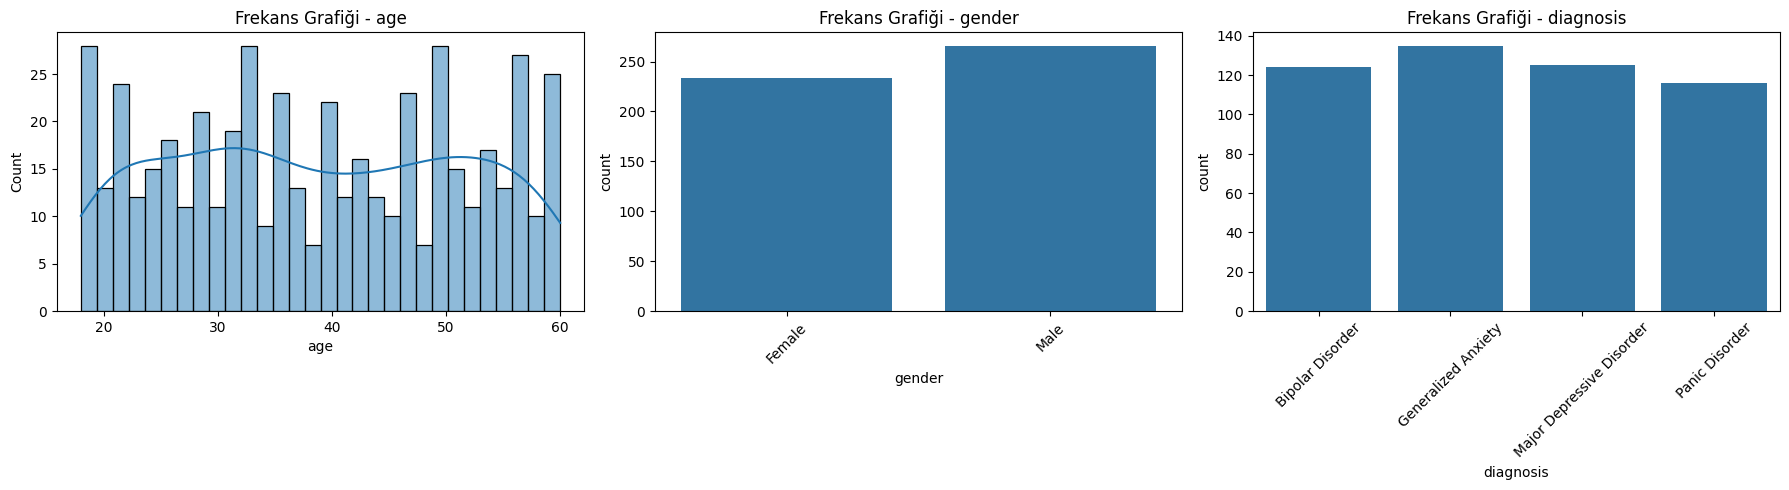

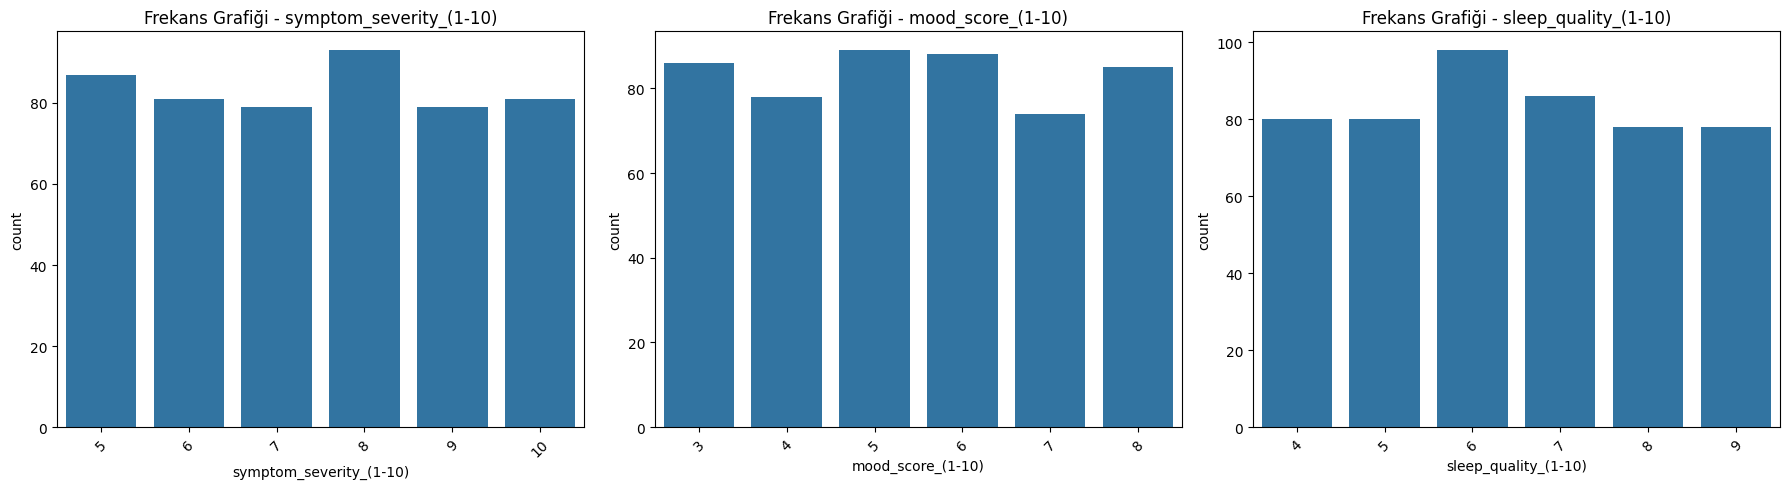

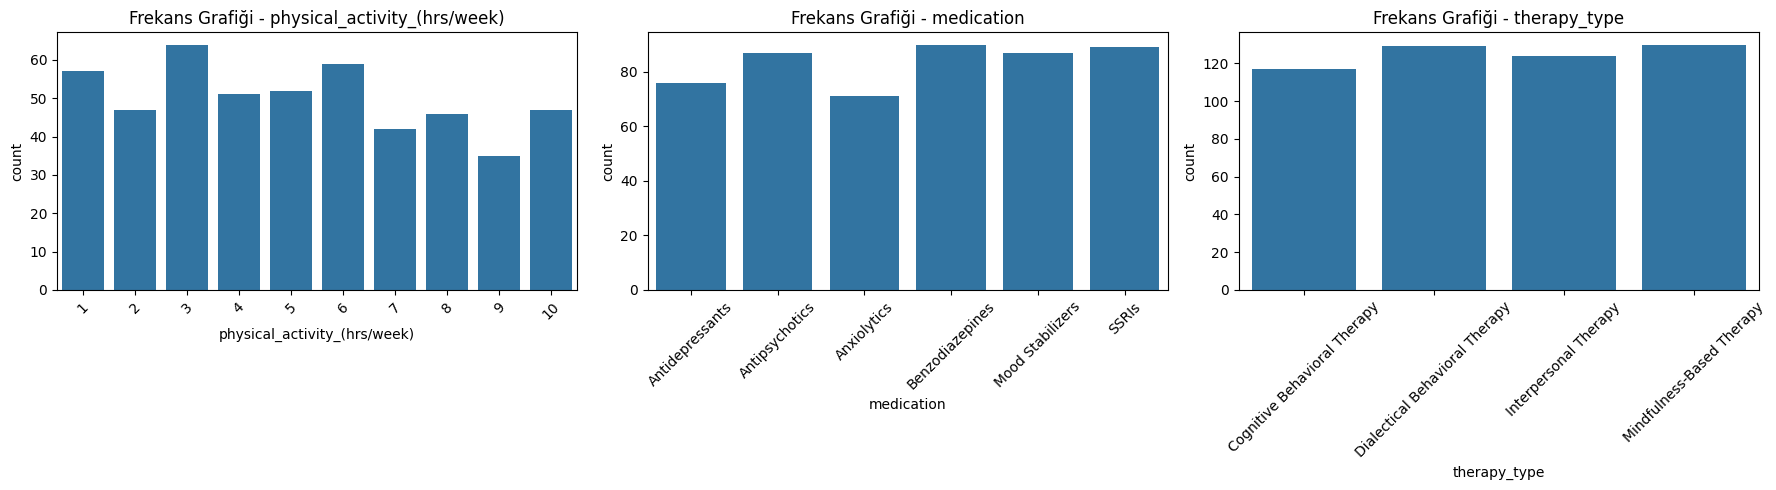

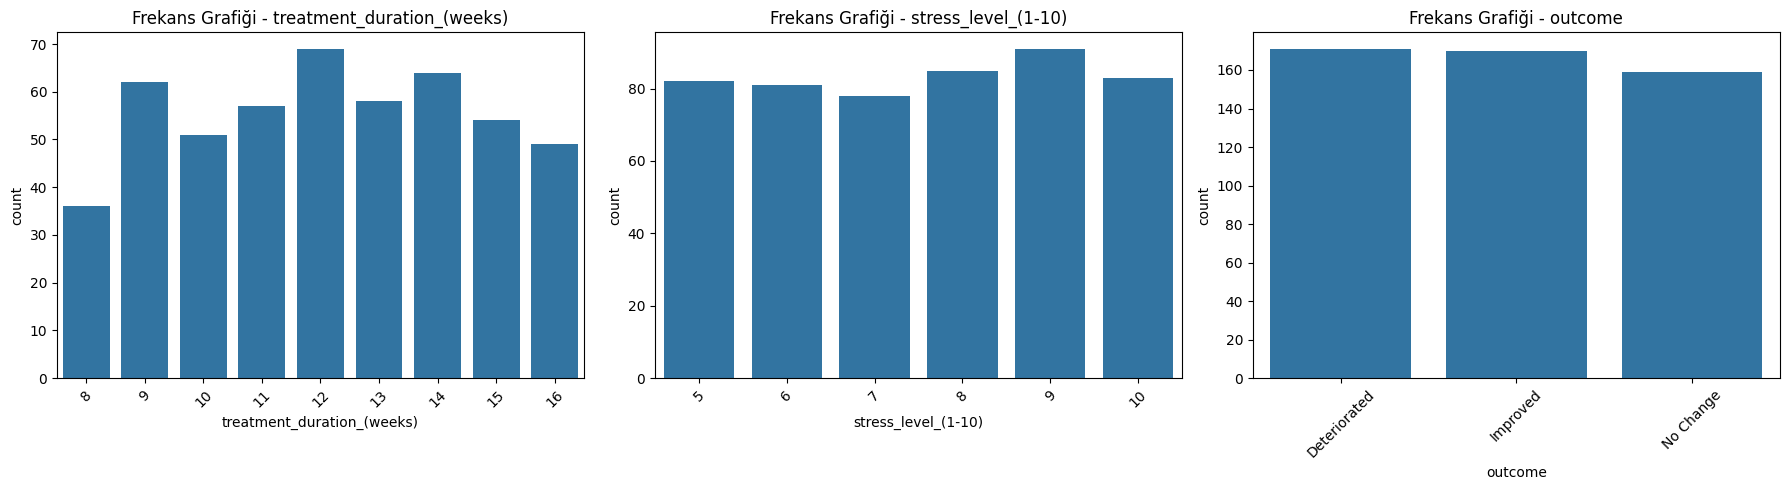

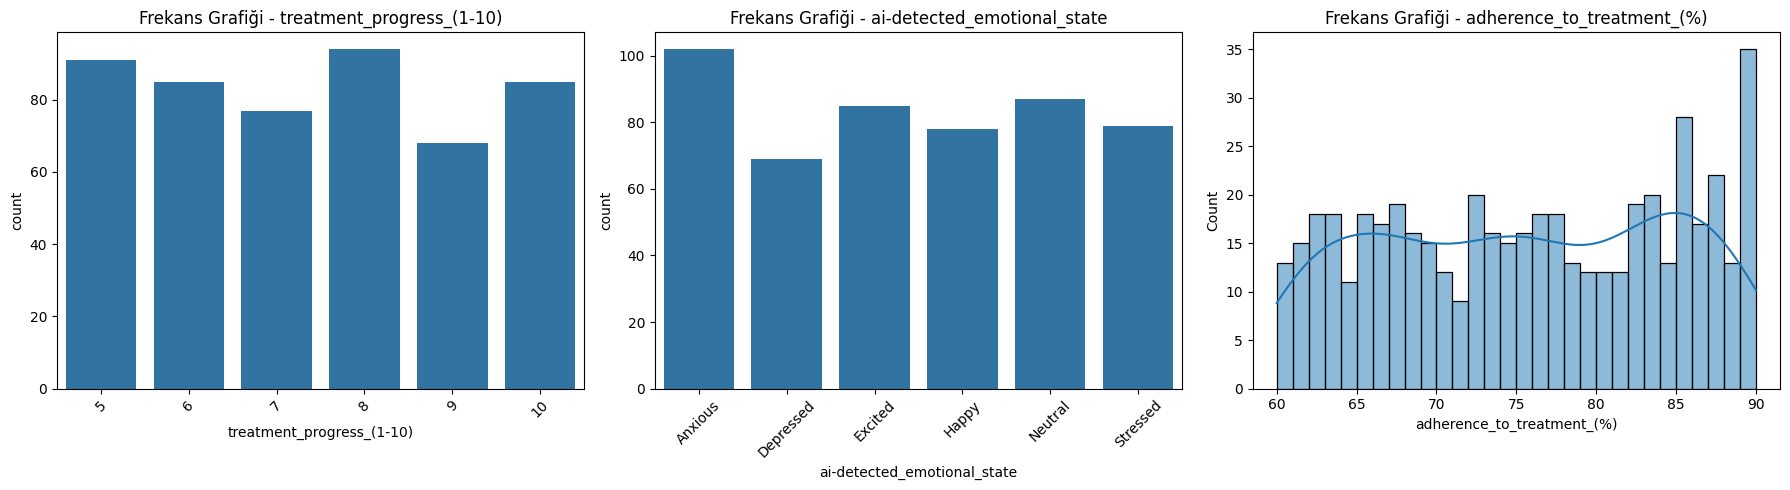

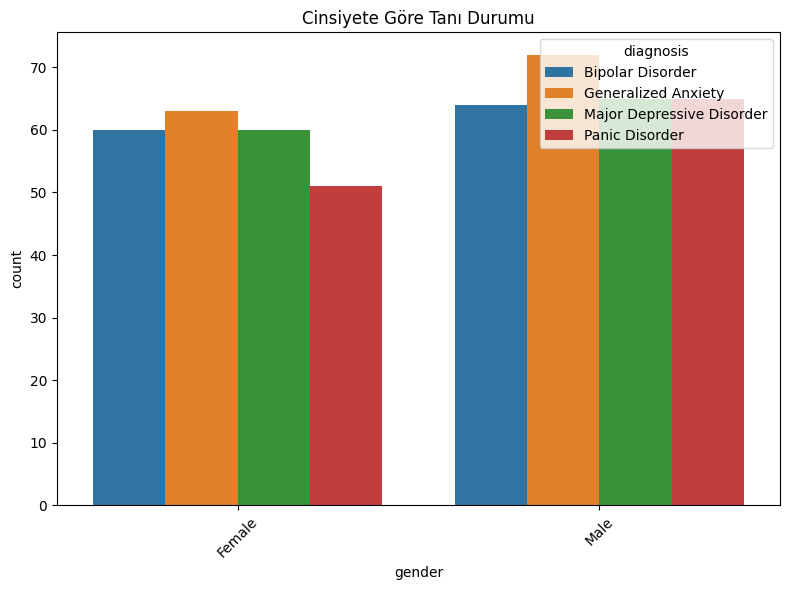

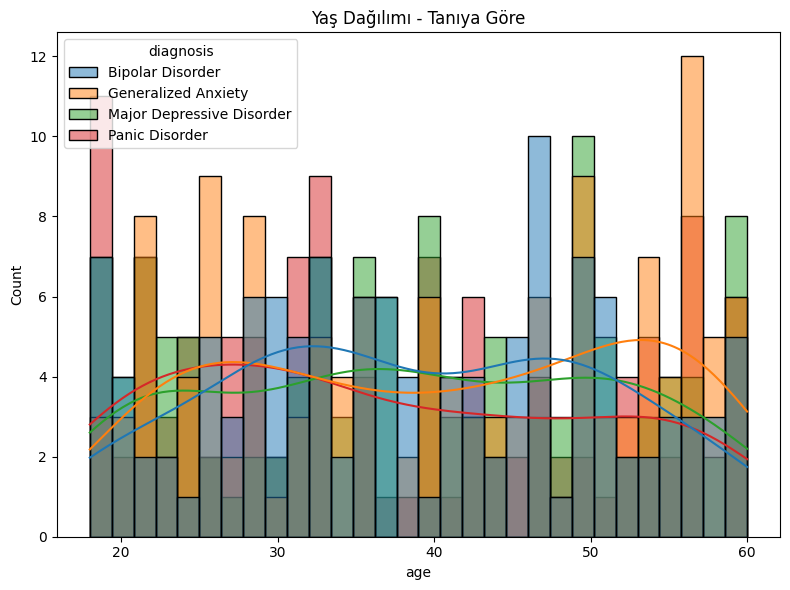

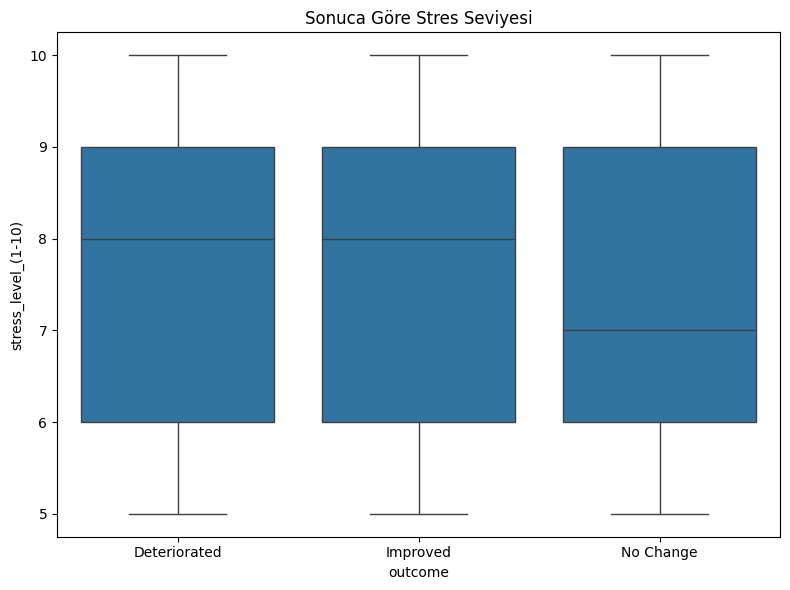

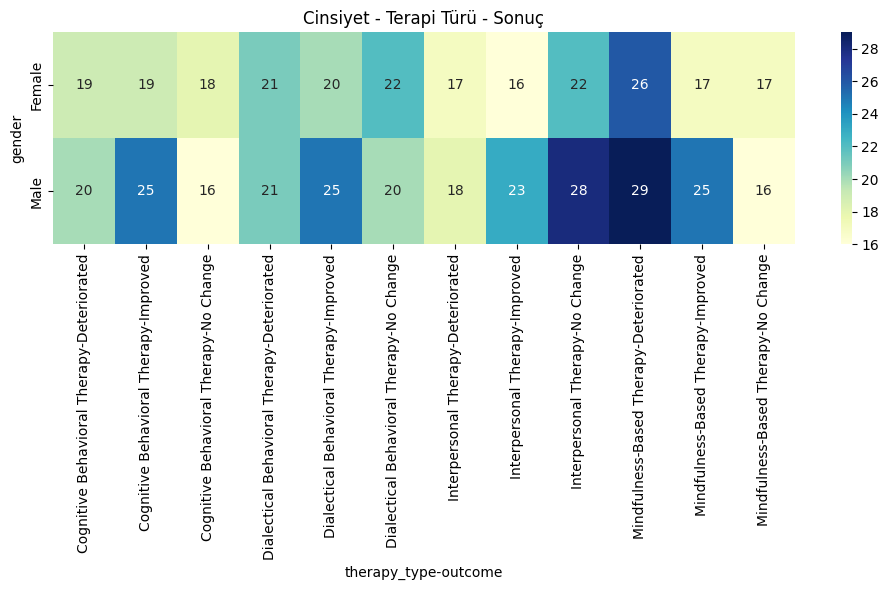

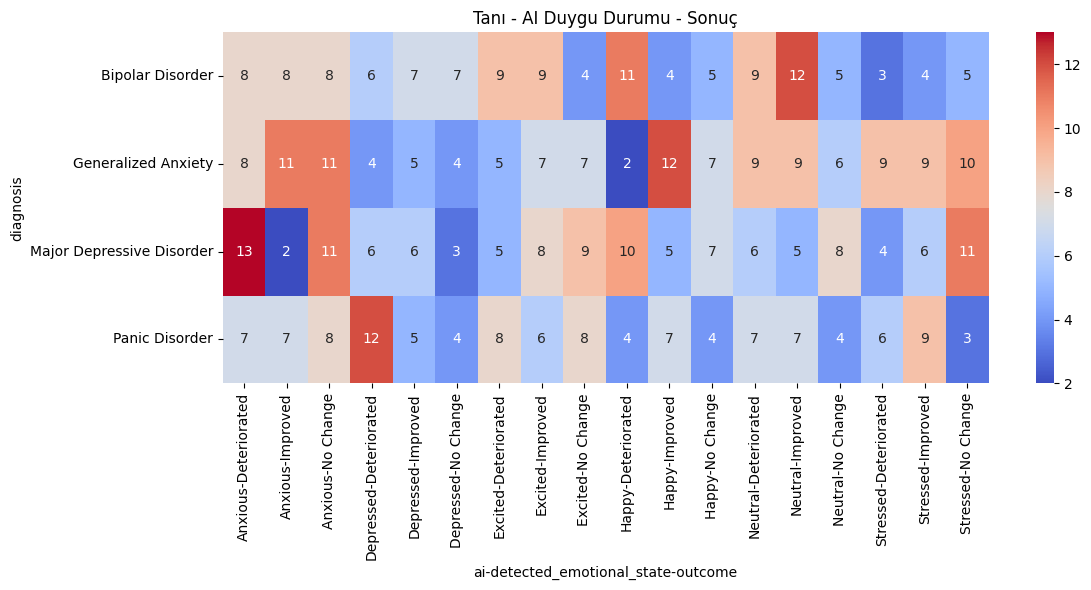

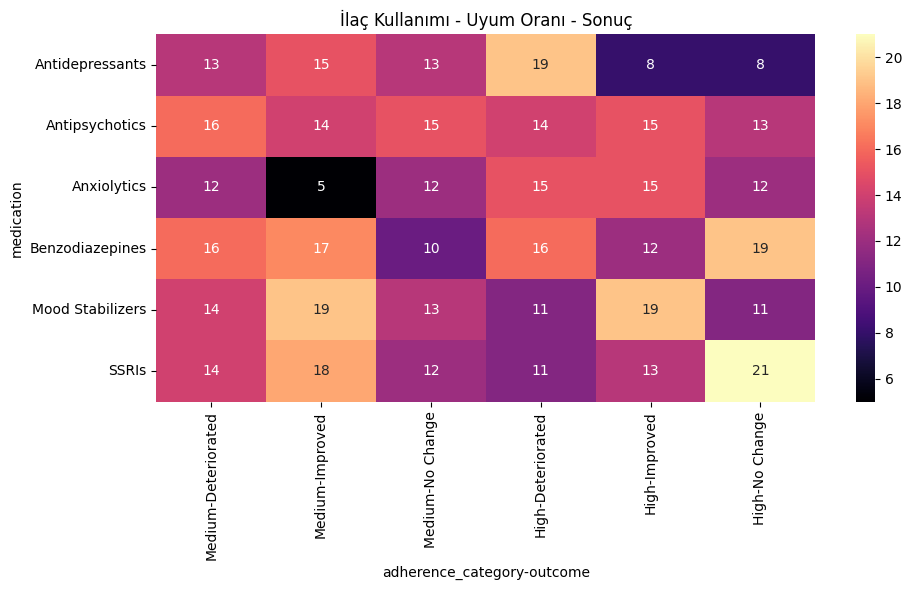

In [9]:
# VERİ GÖRSELLEŞTİRME 

import warnings
warnings.filterwarnings('ignore')
# Gereksiz sütunları sil
df.drop(columns=["Patient ID", "Treatment Start Date"], inplace=True)
print("Gereksiz sütunlar silindi!")

# Kategorik veri tipi atamaları
kategorik_sütunlar = ["Gender", "Diagnosis", "Medication", "Therapy Type", 
                      "Outcome", "AI-Detected Emotional State"]

for col in kategorik_sütunlar:
    df[col] = df[col].astype("category")

print("Kategorik sütunlar dönüştürüldü!")
print(df.head())


# Her sütunun frekans grafiğini çizmek için bir döngü
# İlk 20 sütunla sınırlı tut
columns_to_plot = df.columns[:20]

# Grafik üret ve kaydet
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        # Kategorik veri olarak ele al
        sns.countplot(data=df, x=column)
        plt.xticks(rotation=45)
    else:
        # Sayısal veri için histogram
        sns.histplot(df[column].dropna(), kde=True, bins=30)

    plt.title(f'Frekans Grafiği - {column}')
    plt.tight_layout()
    plt.tight_layout()
    plt.show()


# Sütun adlarını sadeleştirme
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Frekans Grafiklerini 3'lü Gruplar Halinde Gösterme

columns_to_plot = df.columns[:20]
cols_per_fig = 3  # her figürde 3 grafik
num_plots = len(columns_to_plot)
num_figs = (num_plots + cols_per_fig - 1) // cols_per_fig

for i in range(num_figs):
    fig, axes = plt.subplots(1, cols_per_fig, figsize=(6 * cols_per_fig, 5))
    axes = axes.flatten()
    
    for j in range(cols_per_fig):
        idx = i * cols_per_fig + j
        if idx >= num_plots:
            axes[j].axis('off')
            continue

        column = columns_to_plot[idx]
        ax = axes[j]

        if df[column].dtype == 'object' or df[column].nunique() < 20:
            sns.countplot(data=df, x=column, ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        else:
            sns.histplot(df[column].dropna(), kde=True, bins=30, ax=ax)

        ax.set_title(f'Frekans Grafiği - {column}')

    plt.tight_layout()
    plt.show()

# 1. Anlamlı Karşılaştırmalı Grafikler

# Cinsiyet vs Teşhis (Diagnosis)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender', hue='diagnosis')
plt.title('Cinsiyete Göre Tanı Durumu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yaş Dağılımı: Tanıya Göre
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='diagnosis', bins=30, kde=True)
plt.title('Yaş Dağılımı - Tanıya Göre')
plt.tight_layout()
plt.show()

# Stres Seviyesi ve Sonuç (Outcome)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='outcome', y='stress_level_(1-10)')
plt.title('Sonuca Göre Stres Seviyesi')
plt.tight_layout()
plt.show()


# 3x3’lük Heatmap Görselleştirmeleri


# Heatmap 1: Gender x Therapy Type x Outcome
pivot1 = pd.crosstab(index=df['gender'], columns=[df['therapy_type'], df['outcome']])
plt.figure(figsize=(10, 6))
sns.heatmap(pivot1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cinsiyet - Terapi Türü - Sonuç')
plt.tight_layout()
plt.show()

# Heatmap 2: Diagnosis x AI Emotional State x Outcome
pivot2 = pd.crosstab(index=df['diagnosis'], columns=[df['ai-detected_emotional_state'], df['outcome']])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot2, annot=True, fmt='d', cmap='coolwarm')
plt.title('Tanı - AI Duygu Durumu - Sonuç')
plt.tight_layout()
plt.show()

# Heatmap 3: Medication x Tedavi Uyumu x Outcome
# Adherence yüzdelerini kategorilere ayıralım
df['adherence_category'] = pd.cut(df['adherence_to_treatment_(%)'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High'])

pivot3 = pd.crosstab(index=df['medication'], columns=[df['adherence_category'], df['outcome']])
plt.figure(figsize=(10, 6))
sns.heatmap(pivot3, annot=True, fmt='d', cmap='magma')
plt.title('İlaç Kullanımı - Uyum Oranı - Sonuç')
plt.tight_layout()
plt.show()


In [11]:

# MAKINE ÖĞRENME MODELİ
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib

# SMOTE YOK VE LABEL ENCODING YAPILDI

# 1. Veriyi Yükleme
print("1. Adım: Veri yükleniyor...")
try:
    df = pd.read_excel("mental_health_diagnosis_treatment.xlsx")
    print("Veri başarıyla yüklendi! Toplam kayıt sayısı:", len(df))
except Exception as e:
    print("Hata! Dosya yüklenemedi:", e)
    exit()

# 2. Gereksiz Sütunları Çıkar
print("\n2. Adım: Gereksiz sütunlar çıkarılıyor...")
df = df.drop(columns=["Patient ID", "Treatment Start Date"], errors='ignore')
print("Kalan sütunlar:", df.columns.tolist())

# 3. Kategorik Verileri Sayısala Çevirme (Label Encoding)
print("\n3. Adım: Kategorik veriler sayısala çevriliyor...")
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Outcome', errors='ignore')
le_dict = {}

for col in categorical_cols:
    try:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        le_dict[col] = le
        print(f"{col} sütunu encode edildi")
    except Exception as e:
        print(f"Hata! {col} sütunu encode edilemedi:", e)

# 4. Outcome (Hedef Değişken) Dönüşümü
print("\n4. Adım: Outcome (hedef değişken) dönüştürülüyor...")
outcome_mapping = {'Improved': 3, 'No Change': 2, 'Deteriorated': 1}
df['Outcome'] = df['Outcome'].map(outcome_mapping)


# 5. Veriyi Eğitim ve Test Olarak Ayırma
print("\n5. Adım: Veri eğitim ve test setlerine ayrılıyor...")
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Sınıf dağılımını korumak için
)

print(f"Eğitim seti: {X_train.shape[0]} kayıt, Test seti: {X_test.shape[0]} kayıt")

# 6. Random Forest Modelini Eğitme
print("\n6. Adım: Random Forest modeli eğitiliyor...")
model = RandomForestClassifier(
    n_estimators=100,  # Ağaç sayısı
    random_state=42,
    class_weight='balanced'  # Sınıf dengesizliği için
)

model.fit(X_train, y_train)
print("Model eğitimi tamamlandı!")

# 7. Model Performansını Değerlendirme
print("\n7. Adım: Model performansı değerlendiriliyor...")
y_pred = model.predict(X_test)

print("\nDoğruluk Skoru (Accuracy):", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# 8. Modeli ve Encoderları Kaydetme
print("\n8. Adım: Model ve encoderlar kaydediliyor...")
joblib.dump(model, 'mental_health_model.pkl')
joblib.dump(le_dict, 'label_encoders.pkl')
# joblib.dump(outcome_encoder, 'outcome_encoder.pkl')  # Eğer LabelEncoder kullandıysan
joblib.dump(outcome_mapping, 'outcome_mapping.pkl')  # Elle mapping yaptığımız için
print("Kayıt tamamlandı!")

# 9. Yeni Veri ile Tahmin Yapma Örneği
print("\n9. Adım: Yeni veri ile tahmin örneği...")
# Örnek yeni veri (gerçek hayatta bu dışarıdan gelecek)
new_data = {
    'Age': [35],
    'Gender': ['Female'],
    'Diagnosis': ['Major Depressive Disorder'],
    'Symptom Severity (1-10)': [7],
    'Mood Score (1-10)': [4],
    'Sleep Quality (1-10)': [5],
    'Physical Activity (hrs/week)': [3],
    'Medication': ['SSRIs'],
    'Therapy Type': ['Cognitive Behavioral Therapy'],
    'Treatment Duration (weeks)': [12],
    'Stress Level (1-10)': [8],
    'Treatment Progress (1-10)': [6],
    'AI-Detected Emotional State': ['Anxious'],
    'Adherence to Treatment (%)': [63]
}

# Yeni veriyi DataFrame'e çevir
new_df = pd.DataFrame(new_data)

# Aynı encoding işlemlerini uygula
for col in categorical_cols:
    if col in new_df.columns:
        le = le_dict[col]
        new_df[col] = le.transform(new_df[col].astype(str))

# Tahmin yap
prediction = model.predict(new_df)
predicted_outcome = list(outcome_mapping.keys())[list(outcome_mapping.values()).index(prediction[0])]

print(f"\nTahmin Sonucu: {predicted_outcome} (Kod: {prediction[0]})")

1. Adım: Veri yükleniyor...
Veri başarıyla yüklendi! Toplam kayıt sayısı: 500

2. Adım: Gereksiz sütunlar çıkarılıyor...
Kalan sütunlar: ['Age', 'Gender', 'Diagnosis', 'Symptom Severity (1-10)', 'Mood Score (1-10)', 'Sleep Quality (1-10)', 'Physical Activity (hrs/week)', 'Medication', 'Therapy Type', 'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Outcome', 'Treatment Progress (1-10)', 'AI-Detected Emotional State', 'Adherence to Treatment (%)']

3. Adım: Kategorik veriler sayısala çevriliyor...
Gender sütunu encode edildi
Diagnosis sütunu encode edildi
Medication sütunu encode edildi
Therapy Type sütunu encode edildi
AI-Detected Emotional State sütunu encode edildi

4. Adım: Outcome (hedef değişken) dönüştürülüyor...

5. Adım: Veri eğitim ve test setlerine ayrılıyor...
Eğitim seti: 400 kayıt, Test seti: 100 kayıt

6. Adım: Random Forest modeli eğitiliyor...
Model eğitimi tamamlandı!

7. Adım: Model performansı değerlendiriliyor...

Doğruluk Skoru (Accuracy): 0.32

Sınıflandırma 